# Python for Librarians - Week 4 Workalong

For this week's material we are going to really dig into our theme of data science. We are going to be doing some machine learning on the same data set we saw in week 2. The point of this will be to determine if we can derive any **insights** from the data. Basically any characterists, themes, trends, or patterns we might be able to make some predictions with. The idea is that these **insights** would be difficult for a person to spot by looking at the data directly. We are going to rely on the computer to do this for us. In this case we'll be using the [SciKit Learn](https://scikit-learn.org/stable/) Python Library to do this.

We will also build more experience with visualizations using the matplotlib Python Library.

## Machine Learning Basics

You'll see lots of news converage these days about algorithms, how they are applied, and the way they are exploited. Certainly the readings you've been examining for this class have been build around this theme. Our investigation into machine learning (ML for short) is meant to pull back the curtain around the mystique. At the end of the material you'll have a good understanding of the weaknesses of ML. It's built on automatically making guesses on data that it is fed. Yup, that's about it. (ML practitioners don't often brag about this.) So with that said don't let the impressive name fool you. ML is basically easily defined in the list of following steps:

1. Getting your data and cleaning it up
1. Identify what parts of your data are **features**
1. Identify what is your **target variable** that you'll guess based on your features
1. Split your data in **training and testing sets**
1. **Train** your model against the training dataset
1. **Test** your model against the testing dataset
1. ????
1. Profit

Or in other works, we take a big swath of data, pick one thing in that data we'd like to minimize/maximize and we use the relations to the other columns of data to make that happen. This will get more clear as we continue. Specifically speaking we are going to be doing a [classification](https://en.wikipedia.org/wiki/Statistical_classification) problem. The diagram that follows is a good representation of this:

![classification](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/classification.png)

So basically we have a collection of data points (some blue, some red) and we want to divide those points into two classifications using some automatic process. The right side of the diagram shows one potential classification. A 'class' of blue points, anothe of red points, and another class for those in the middle that we can't reliable group into blue or red.


## Decision Tree

This is one of the most basic machine learning model you can use. It is considered a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) method. You create the best [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) that you can based on your training data. Here's an example tree that shows your chance of surviving the Titanic disaster. What we are creating is series of question that when answered will put observations into a _bucket_ or in other terms one of the classification options. We also devise a probability associated with an observation falling into that _bucket_.

The features are described by the labels, however ``sibsp`` - is the number of spouses or siblings on board.

![dtree](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)

You start at the root of the tree and answer the questions about your data point. Eventually you'll hit a bucket that you can but your data point in. In our example here we have two different buckets: **survived** & **died**. Put in another way, this tree tells us that the most important question to ask first is what is the gender of the person you are considering, then next most important question is age above 9 and a half, followed lastly by, does this person have less than three spouses or siblings on board. We construct this tree using only some of our data, then we use the rest of our data to test how good our tree is. Once that is done with have an ML model we can use to make predictions on data it has never seen.

With all of that preamble out of the way. Let's start some code. Run the next cell to load up all of the Libraries we'll need for this week's lesson.

In [30]:
#This should look familar
import pandas
import numpy

#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'ML pieces'
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

This next two cells should look familar, we are loading up the CSV file from week two and putting it in a pandas dataframe. (The dataset is a bit modified and truncated just to make life a bit easier)

In [31]:
#We'll reuse the same data set from Week 2, the circulation stats from
# the SF Library system
sf_data = pandas.read_csv("https://raw.githubusercontent.com/elibtronic/lja_datasets/master/week_4_workalong_san_francisco.csv")


In [33]:
#Run this a few times to seem more glimpses of the data.
sf_data.sample(10)

,Patron Type Definition,Total Checkouts,Total Renewals,Circulation Active Year
246387,1,154,67,2014
172326,1,0,0,0
170712,1,19,38,2011
7249,1,1,0,2016
374699,0,21,0,2014
255220,1,2,0,2016
125062,1,189,76,2016
342753,2,0,0,0
190968,1,1,0,2015
367453,2,194,2,2013


----

## Prepping the data for our ML model

Our **Target** variable is going to be based on the following:

In [27]:
#Let's use our Panda knowledge to see what categories are we looking at
sf_data["Patron Type Definition"].value_counts()


1    313870
2     88024
0     21554
Name: Patron Type Definition, dtype: int64

So we have 3 types of patrons:
- category 0
- category 1
- category 2

This will be our 'target' or the thing we'll try to guess.

We are going to build our ML model to be able to guess what category a patron is based on:
- total checkouts
- total reviewals
- circulation active year

These 3 columns will be our features


The next cell will built the lists that will hold this data

In [34]:
features = ["Total Checkouts", "Total Renewals", "Circulation Active Year"]
#The usual notation is to put all of the features into a variable called X
X = sf_data[features]

target = sf_data["Patron Type Definition"]
#Similarly the target is often put in a variable called y
y = target


With these pieces done we'll now build our ML Decision Tree Classifier. Don't worry if this cell looks complicated you'll learn about the important pieces in it soon enough

In [36]:
#what percentage of the dataset will we devote to testing our tree
#the remaining 80% of the data will be used for training
test_percent = 0.2


#train_test_split takes our data and creates for different sets with it
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size= test_percent,
                                                   random_state=10)
# Create a Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# We give our decision tree our training data. This is that it uses to build the tree
treeClass = treeClass.fit(X_train,y_train)

# We now test how accurate the tree is by giving it our testing data and seeing how
#the decision tree it created scores those values
y_pred = treeClass.predict(X_test)



## That's it?

Yup that's it. We separated the data into features and our target then we split the rows in testing and training data. Line 12 built the model in a variable called `treeClass`. Line 15 trained it, our in other parlance _fit_ it against the data. Line 19 tested against the test set, or in otherwords _predicted_ what guess our model would make. Let' evaluate the model by printing out how accurate it is. The next cell does this.

In [37]:
#What is the accuracy of our ML Model?
metrics.accuracy_score(y_test,y_pred)

0.7111701499586728

So right out of the box the ML model can accurately classify **71%** of the data in the dataset. Let's just take a second to think about this. Based on just 3 values we can guess the type of patron we are looking at with 71% accuracy. Now imagine what services like Google can do with the data they have. It is worth noting though that the model is as long as good as the data it is built on. Prejudiced data will lead to prejudiced models.

----

## Hyperparameters - Testing Set Size

Let's return to our code. We are now going to fiddle with some paramaters to hopefully increase accuracy. In our next cell we are going to experiment with using different amounts of our data for testing. We'll also graph out the accuracy when we adjust this value. Run the next cell a few times to see your graph change shape.

## Why is my graph changing?

## Hyperparameters - Maximium Tree Depth

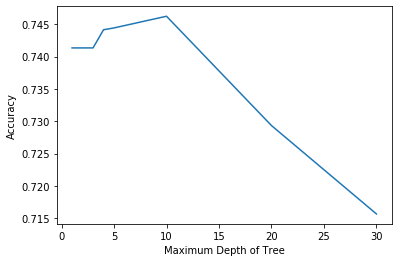

In [23]:
test_percent = 20
max_options = [1,2,3,4,5,10,20,30]

accuracy = []
tree_max = []

for max_d in max_options:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )
    
    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)

    
plt.plot(max_options,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()

# Making Predictions

In [24]:
guess = [50,100,2018]

dp = pandas.DataFrame([guess],columns=X_test.columns)
treeClass.predict_proba(dp)

array([[0., 1., 0.]])

----


# RandomForest 

## Lots of decision trees

In [38]:





test_percent = 20

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

#Create Random Classifier
clf = RandomForestClassifier(n_estimators=5, random_state=0)

#Train
clf.fit(X_train,y_train)

#Predict
y_pred = clf.predict(X_train)

#Accuracy
metrics.accuracy_score(y_train,y_pred)

0.8004357092673826